In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import csv
from matplotlib.colors import ListedColormap

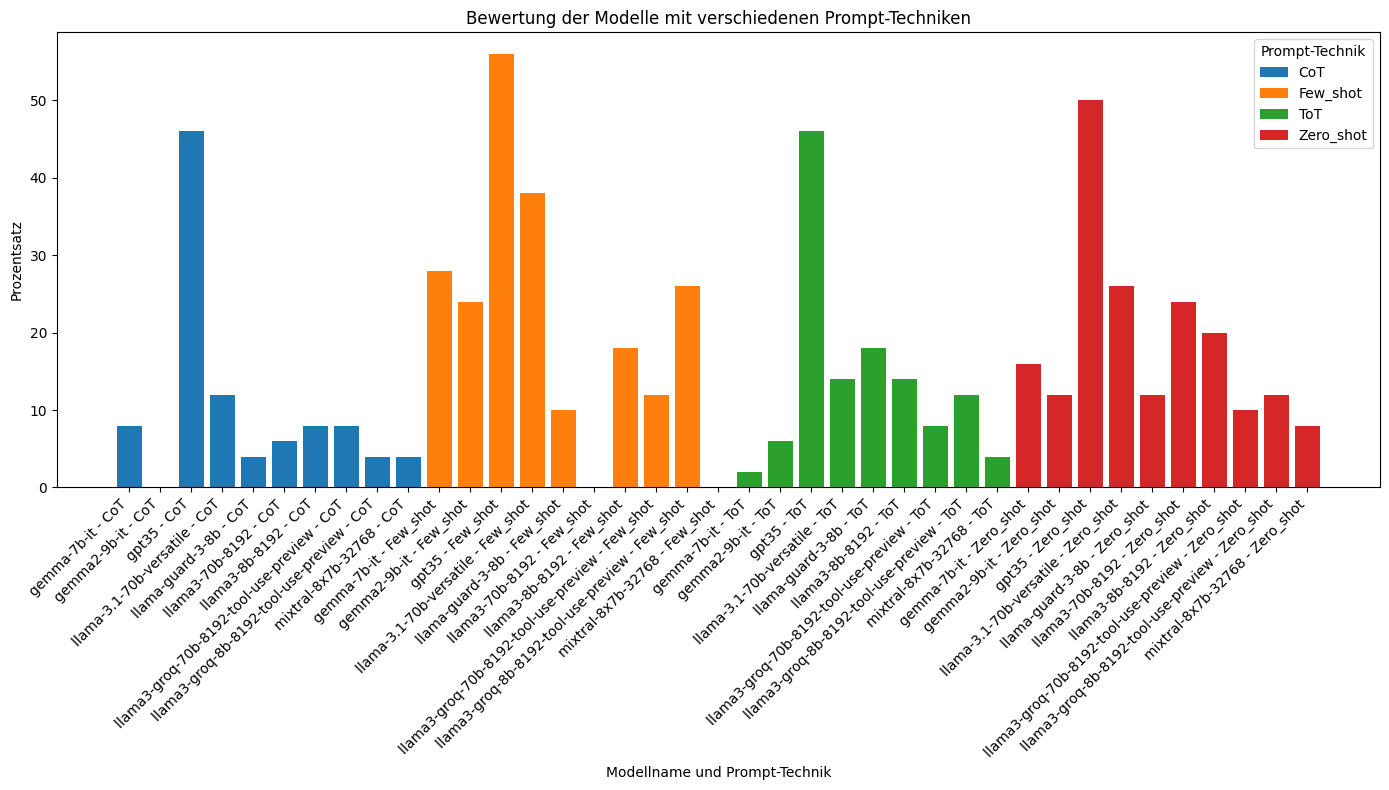

In [31]:
import pandas as pd
import matplotlib.pyplot as plt

# Lade die CSV-Datei
csv_file = 'eval_pass@K.csv'
data = pd.read_csv(csv_file)

# Erstelle ein DataFrame
df = pd.DataFrame(data)

# Gruppieren und Umformen der Daten für das Balkendiagramm
# Wir verwenden die Spalten 'model_name', 'prompt_technik' und 'Pass@1' für das Diagramm
plt.figure(figsize=(14, 8))

# Erstellen des Balkendiagramms
for technique in df['prompt_technik'].unique():
    subset = df[df['prompt_technik'] == technique]
    plt.bar(subset['model_name'] + ' - ' + technique, subset['Pass@1'], label=technique)

plt.xlabel('Modellname und Prompt-Technik')
plt.ylabel('Prozentsatz')
plt.title('Bewertung der Modelle mit verschiedenen Prompt-Techniken')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Prompt-Technik')
plt.tight_layout()

# Diagramm anzeigen
plt.show()


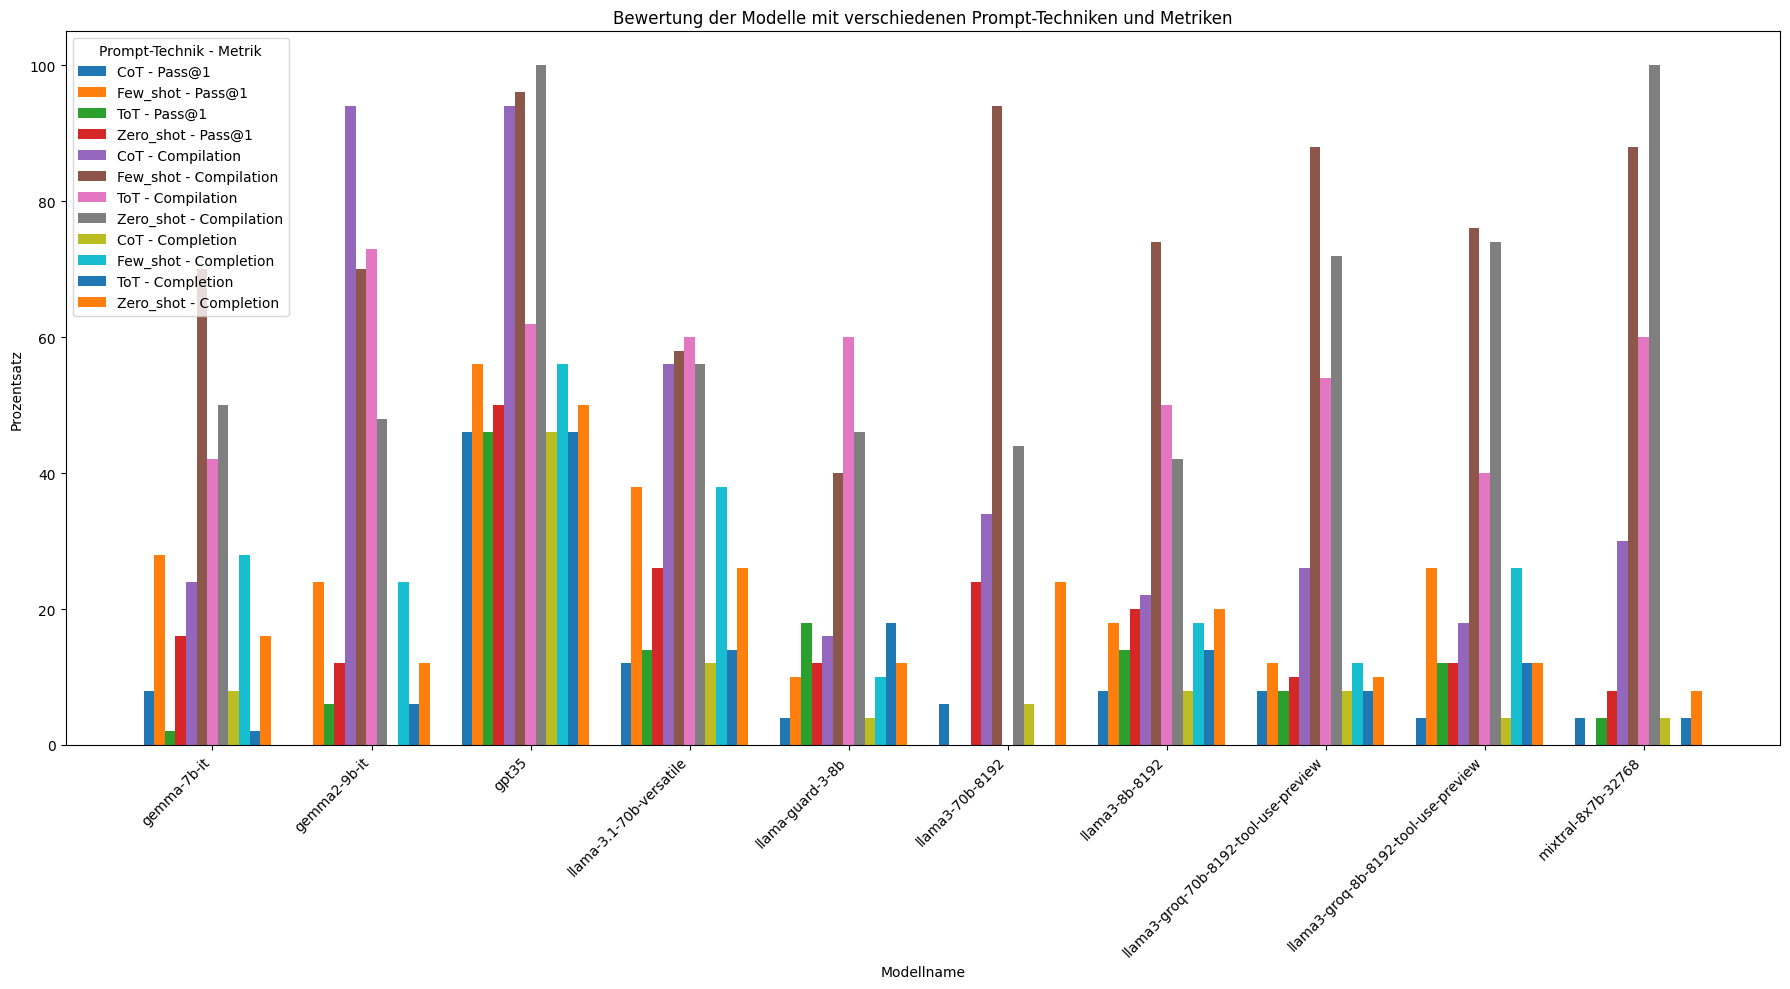

In [50]:
import pandas as pd
import matplotlib.pyplot as plt

# Lade die CSV-Datei
csv_file = 'eval_pass@K.csv'
data = pd.read_csv(csv_file)

# Erstelle ein DataFrame
df = pd.DataFrame(data)

# Setze die Größe des Diagramms
plt.figure(figsize=(18, 10))

# Definiere Balkenbreite und andere Parameter
bar_width = 1
models = df['model_name'].unique()
prompt_techniques = df['prompt_technik'].unique()
num_techniques = len(prompt_techniques)
num_metrics = 3  # Anzahl der Metriken

# Setze Positionen für die Balken auf der x-Achse
model_positions = {model: idx * (num_techniques + 1) * num_metrics for idx, model in enumerate(models)}

# Erstelle Balken für jede Metrik und Prompt-Technik
metrics = ['Pass@1', 'Compilation', 'Completion']

for metric_idx, metric in enumerate(metrics):
    for idx, technique in enumerate(prompt_techniques):
        subset = df[df['prompt_technik'] == technique]
        x_positions = [model_positions[model] + (idx * bar_width) + (metric_idx * bar_width * num_techniques) for model in models]
        heights = [subset.loc[subset['model_name'] == model, metric].values[0] if not subset.loc[subset['model_name'] == model, metric].empty else 0 for model in models]
        plt.bar(x_positions, heights, width=bar_width, label=f'{technique} - {metric}')


# Anpassen der x-Achsen-Beschriftungen
x_labels = [model for model in models]
x_ticks = [pos + (bar_width * (num_techniques / 2) * num_metrics) for pos in model_positions.values()]
plt.xticks(ticks=x_ticks, labels=x_labels, rotation=45, ha='right')

plt.xlabel('Modellname')
plt.ylabel('Prozentsatz')
plt.title('Bewertung der Modelle mit verschiedenen Prompt-Techniken und Metriken')
plt.legend(title='Prompt-Technik - Metrik')
plt.tight_layout()

# Diagramm anzeigen
plt.show()


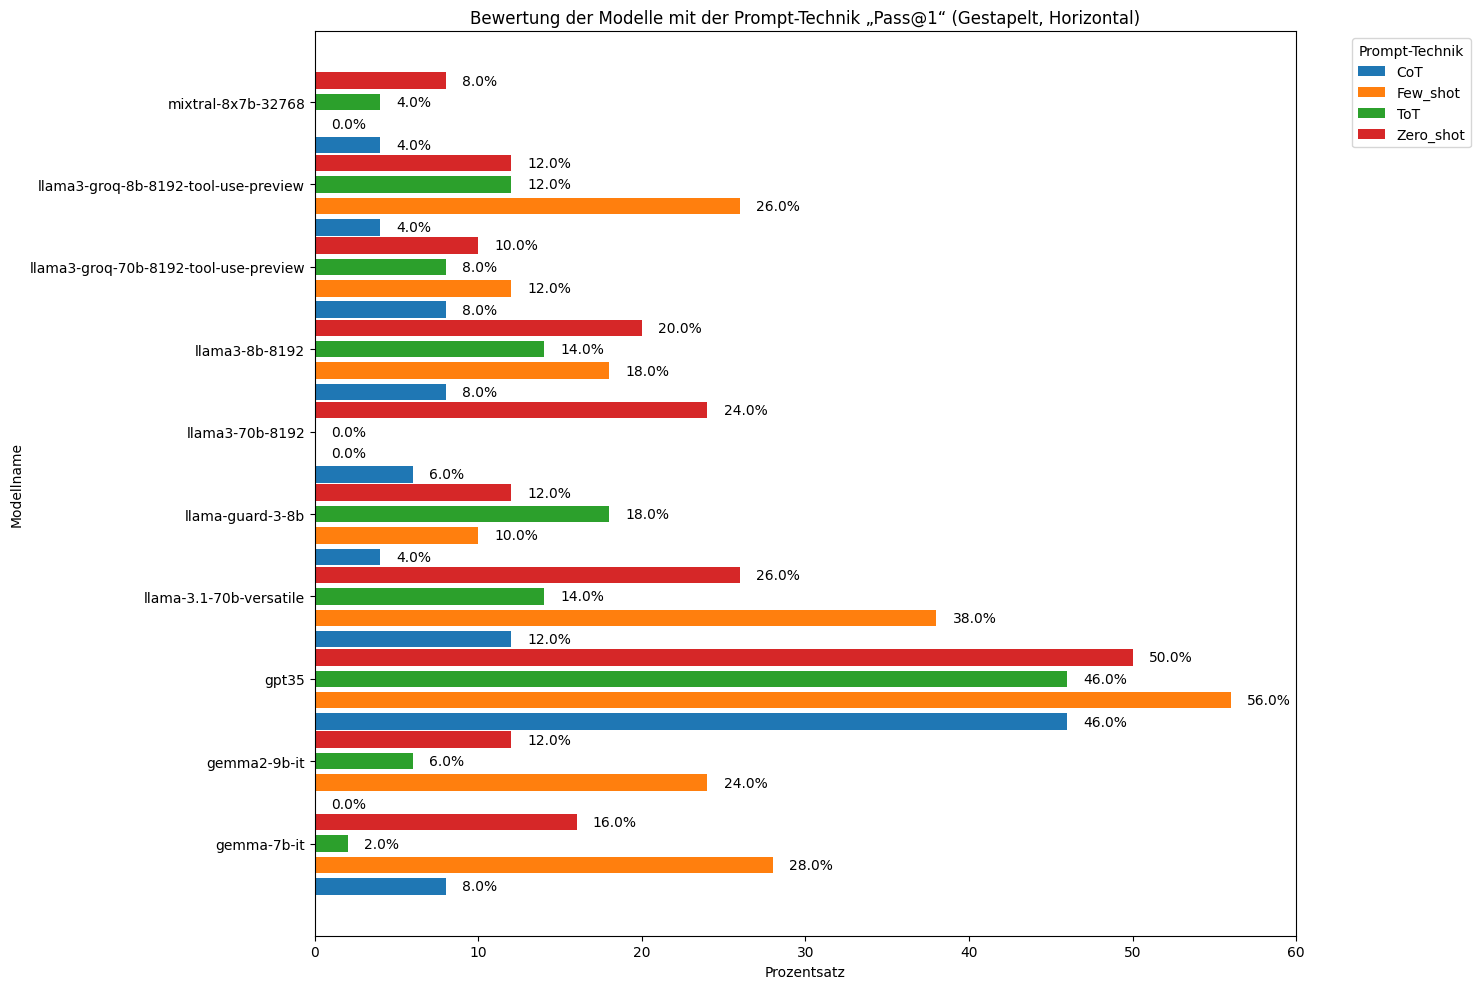

In [71]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Lade die CSV-Datei
csv_file = 'eval_pass@K.csv'
data = pd.read_csv(csv_file)

# Erstelle ein DataFrame
df = pd.DataFrame(data)

# Setze die Größe des Diagramms
plt.figure(figsize=(15, 10))

# Definiere Balkenhöhe und andere Parameter
bar_height = 1
models = df['model_name'].unique()
prompt_techniques = df['prompt_technik'].unique()
num_techniques = len(prompt_techniques)

# Erstelle eine Farbkodierung für jede Technik
colors = plt.get_cmap('tab10').colors

# Setze Positionen für die Balken auf der y-Achse
model_positions = np.arange(len(models)) * (num_techniques + 1)  # Abstand zwischen den Modellen

# Metrik, die angezeigt werden soll
metric = 'Pass@1'

# Erstelle Balken für jede Prompt-Technik
for idx, technique in enumerate(prompt_techniques):
    subset = df[df['prompt_technik'] == technique]
    
    # Initialisiere die Positionen und Bottom-Werte für die Balken
    bottom_values = np.zeros(len(models))
    
    # Höhen für die Balken berechnen
    heights = [subset.loc[subset['model_name'] == model, metric].values[0] if not subset.loc[subset['model_name'] == model, metric].empty else 0 for model in models]
    
    # Plotten der Balken
    bars = plt.barh(model_positions + idx * (bar_height + 0.3), heights, bar_height, 
                    left=bottom_values, 
                    label=f'{technique}', 
                    color=colors[idx % len(colors)])
    
    # Werte in den Balken einfügen
    for bar in bars:
        plt.text(bar.get_width() + 1, bar.get_y() + bar.get_height()/2, 
                 f'{bar.get_width()}%', 
                 va='center', 
                 ha='left', 
                 color='black')

    bottom_values += np.array(heights)

# Anpassen der y-Achsen-Beschriftungen
plt.yticks(model_positions + (num_techniques / 2) * (bar_height + 0.3), models)

plt.xlabel('Prozentsatz')
plt.ylabel('Modellname')
plt.title('Bewertung der Modelle mit der Prompt-Technik „Pass@1“ (Gestapelt, Horizontal)')
plt.legend(title='Prompt-Technik', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xlim(0, 60)  # Setze die x-Achse auf 0 bis 70 für Prozentsätze
plt.tight_layout()

# Diagramm anzeigen
plt.show()


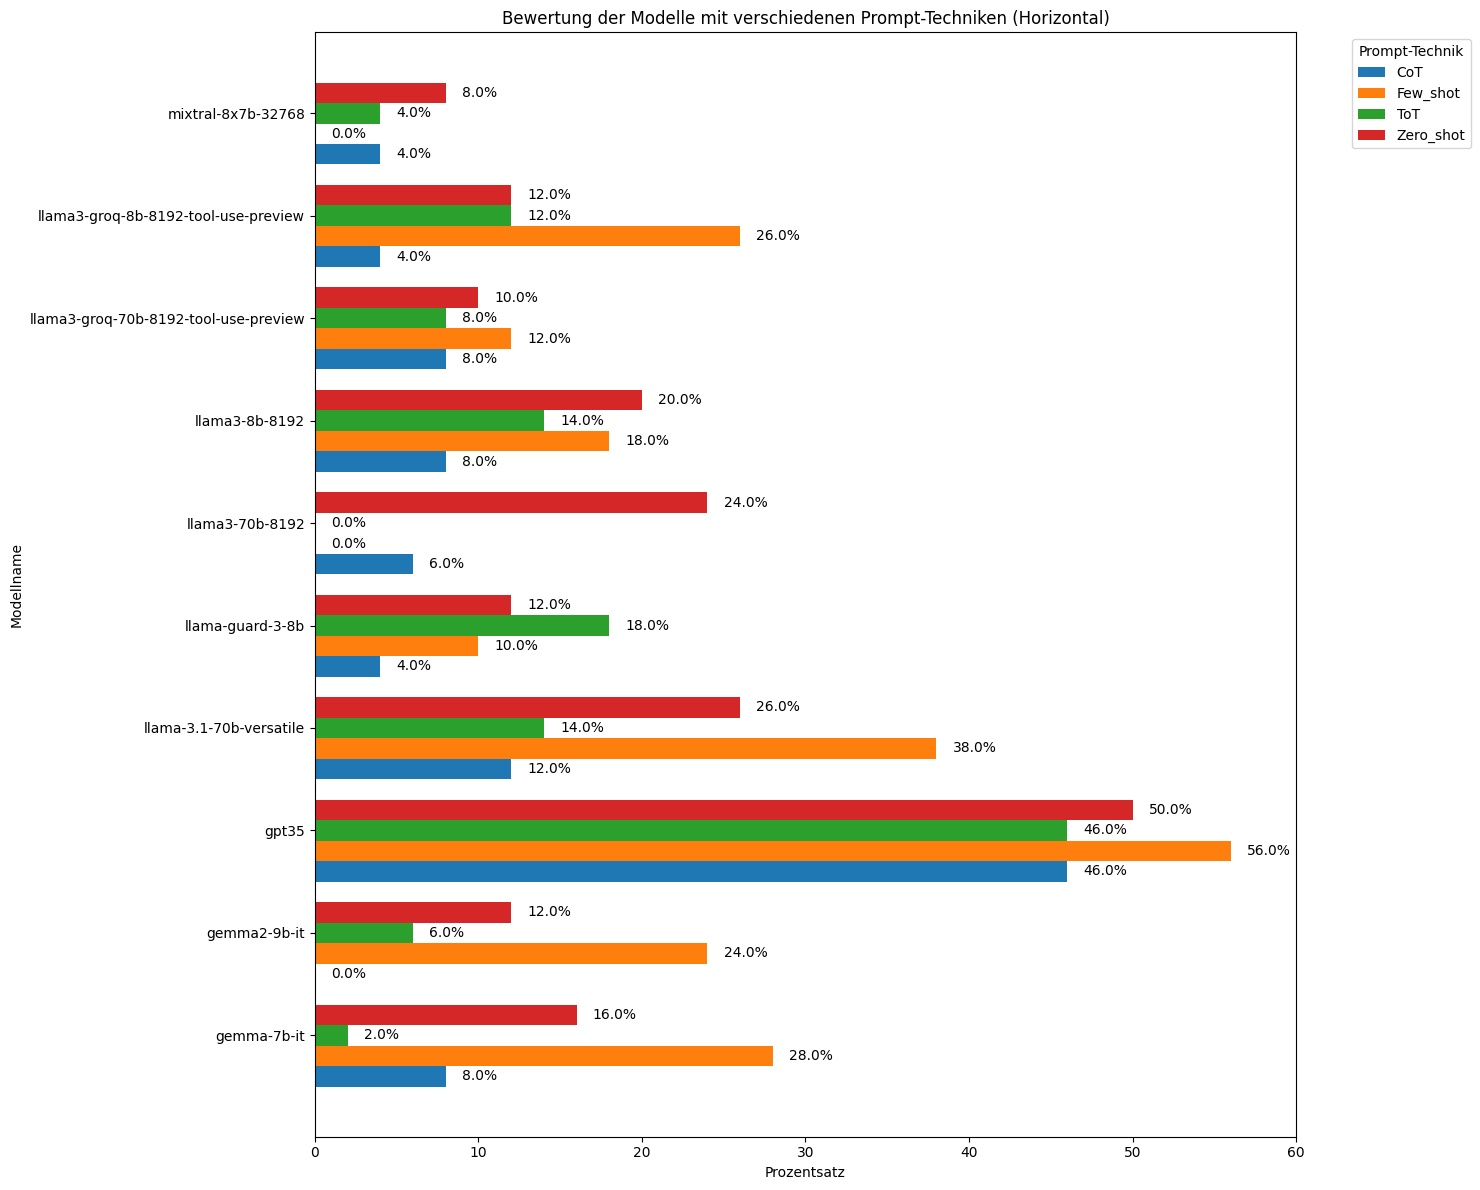

In [83]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Lade die CSV-Datei
csv_file = 'eval_pass@K.csv'
data = pd.read_csv(csv_file)

# Erstelle ein DataFrame
df = pd.DataFrame(data)

# Setze die Größe des Diagramms
plt.figure(figsize=(15, 12))

# Definiere Balkenbreite und andere Parameter
bar_height = 1
models = df['model_name'].unique()
prompt_techniques = df['prompt_technik'].unique()
num_techniques = len(prompt_techniques)

# Erstelle eine Farbkodierung für jede Technik
colors = plt.get_cmap('tab10').colors

# Setze Positionen für die Balken auf der y-Achse
model_positions = np.arange(len(models)) * (num_techniques + 1)  # Positionen für die Modelle

# Metrik, die angezeigt werden soll
metric = 'Pass@1'

# Erstelle Balken für jede Prompt-Technik
for idx, technique in enumerate(prompt_techniques):
    subset = df[df['prompt_technik'] == technique]
    
    # Höhen für die Balken berechnen
    heights = [subset.loc[subset['model_name'] == model, metric].values[0] if not subset.loc[subset['model_name'] == model, metric].empty else 0 for model in models]
    
    # Positionen der Balken
    positions = model_positions + idx * bar_height

    # Plotten der Balken
    bars = plt.barh(positions, heights, bar_height, 
                    label=f'{technique}', 
                    color=colors[idx % len(colors)])

    # Werte in die Balken einfügen
    for bar in bars:
        plt.text(bar.get_width() + 1, bar.get_y() + bar.get_height()/2, 
                 f'{bar.get_width()}%', 
                 va='center', 
                 ha='left', 
                 color='black')

# Anpassen der y-Achsen-Beschriftungen
plt.yticks(model_positions + (num_techniques / 2) * bar_height, models)

plt.xlabel('Prozentsatz')
plt.ylabel('Modellname')
plt.title('Bewertung der Modelle mit verschiedenen Prompt-Techniken')
plt.legend(title='Prompt-Technik', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xlim(0, 60)  # Setze die x-Achse auf 0 bis 100 für Prozentsätze
plt.tight_layout()

# Diagramm anzeigen
plt.show()


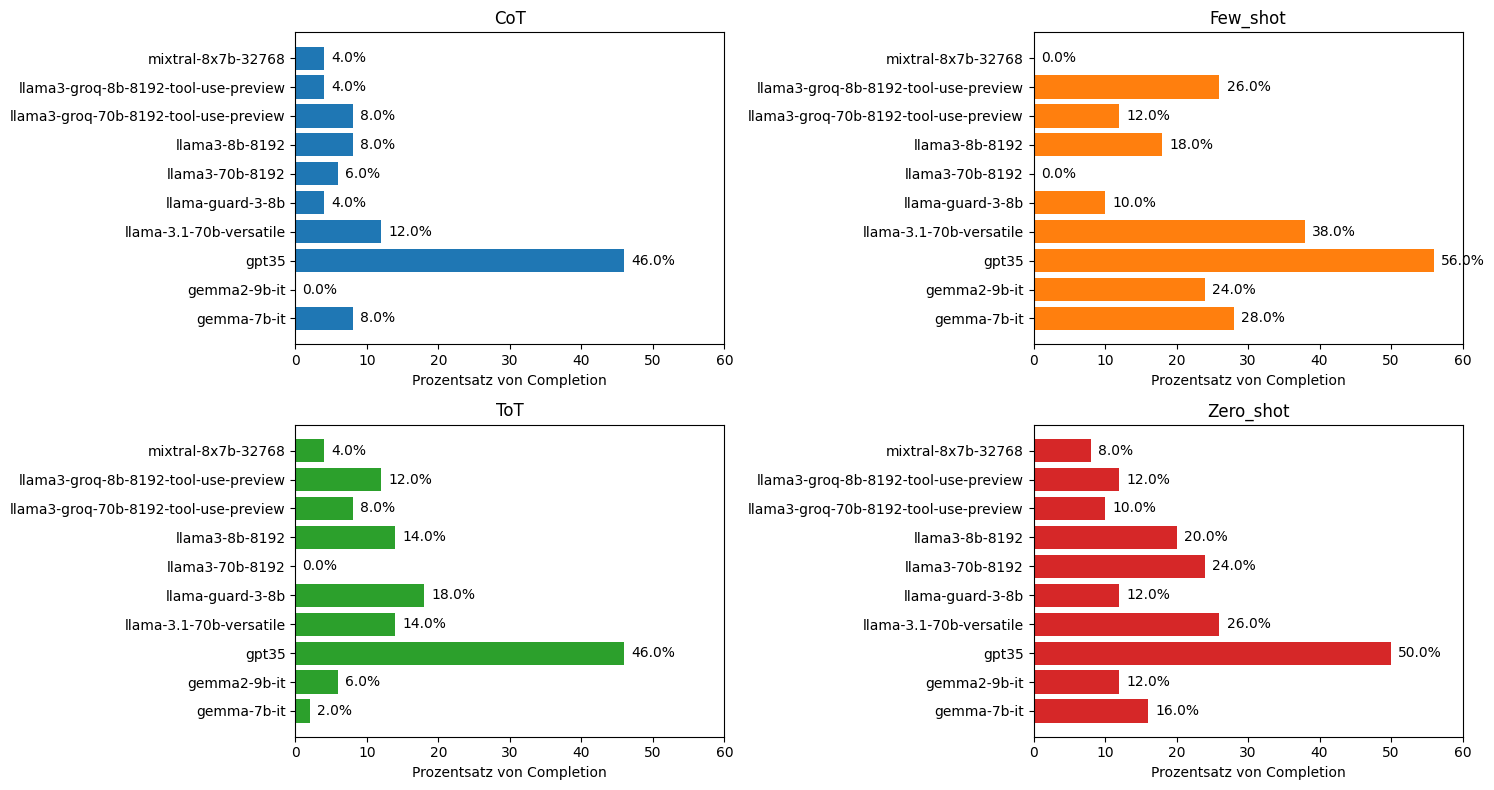

In [134]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Lade die CSV-Datei
csv_file = 'eval_pass@K.csv'
data = pd.read_csv(csv_file)

# Erstelle ein DataFrame
df = pd.DataFrame(data)

# Definiere Balkenbreite und andere Parameter
bar_height = 0.8
models = df['model_name'].unique()
prompt_techniques = df['prompt_technik'].unique()

# Erstelle eine Farbkodierung für jede Technik
colors = plt.get_cmap('tab10').colors

# Metrik, die angezeigt werden soll
metric = ''

# Anzahl der Prompt-Techniken
num_techniques = len(prompt_techniques)

# Erstelle ein Raster von Subplots
fig, axes = plt.subplots(nrows=(num_techniques + 1) // 2, ncols=2, figsize=(15, 8))
axes = axes.flatten()

# Erstelle ein separates Diagramm für jede Prompt-Technik
for idx, technique in enumerate(prompt_techniques):
    subset = df[df['prompt_technik'] == technique]
    
    # Höhen für die Balken berechnen
    heights = [subset.loc[subset['model_name'] == model, metric].values[0] if not subset.loc[subset['model_name'] == model, metric].empty else 0 for model in models]
    
     # Positionen der Balken
    positions = np.arange(len(models))  # Positionen für die Modelle

    # Plotten der Balken
    bars = axes[idx].barh(positions, heights, bar_height, 
                          label=f'{technique}', 
                          color=colors[idx % len(colors)])

    # Werte in die Balken einfügen
    for bar in bars:
        axes[idx].text(bar.get_width() + 1, bar.get_y() + bar.get_height()/2, 
                       f'{bar.get_width()}%', 
                       va='center', 
                       ha='left', 
                       color='black')

    # Anpassen der y-Achsen-Beschriftungen
    axes[idx].set_yticks(positions)
    axes[idx].set_yticklabels(models)
    axes[idx].set_xlabel(f'Prozentsatz von {metric}')
    axes[idx].set_title(f'{technique}')
    axes[idx].set_xlim(0, 60)  # Setze die x-Achse auf 0 bis 100 für Prozentsätze

# Entferne leere Subplots
for ax in axes[num_techniques:]:
    fig.delaxes(ax)

plt.tight_layout()
plt.show()


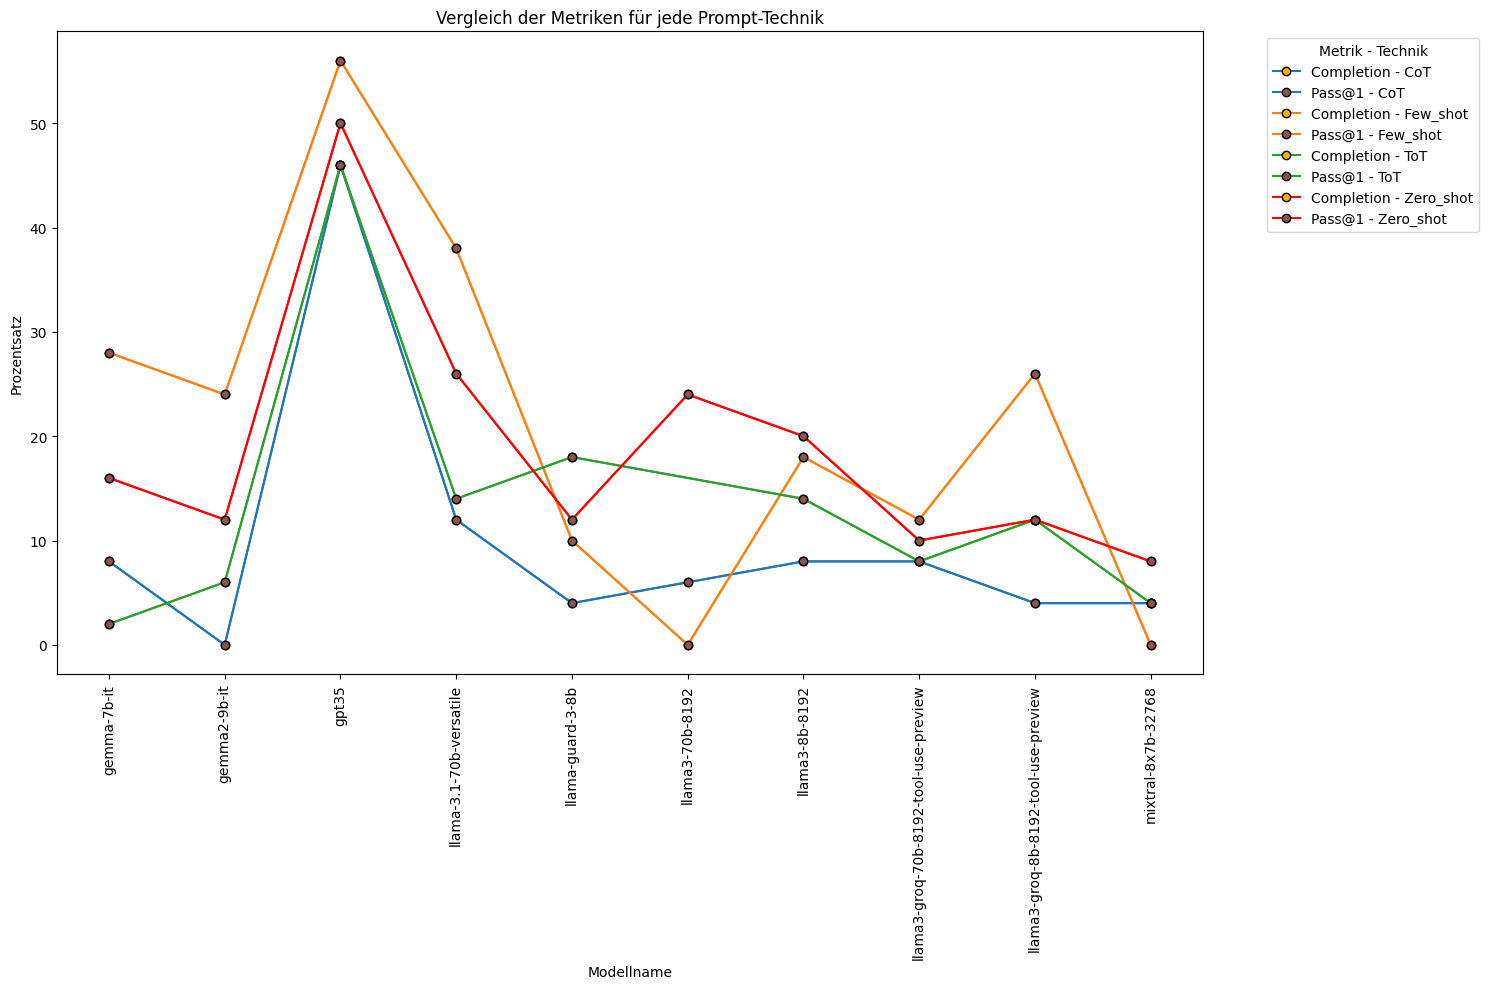

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

# Lade die CSV-Datei
csv_file = 'eval_pass@K.csv'
data = pd.read_csv(csv_file)

# Definiere benutzerdefinierte Farben für die Metriken und Techniken
metric_colors = {
    'Compilation': '#d62728',  # Dunkelrot
    'Completion': '#ffb001',   # Violett
    'Pass@1': '#8c564b'        # Braun
}

technique_colors = {
    'CoT': '#1f77b4',         # Blau
    'Few_shot': '#ff7f0e',    # Orange
    'ToT': '#2ca02c',         # Grün
    'Zero_shot': '#FF0000'    # Rot
}

# Erstelle das Diagramm
plt.figure(figsize=(15, 10))

# Erstelle eine Farbkodierung für jede Kombination von Metrik und Technik
for technique in data['prompt_technik'].unique():
    subset = data[data['prompt_technik'] == technique]
    x = subset['model_name']
    
    for metric in ['Completion', 'Pass@1']:
        plt.plot(
            x, 
            subset[metric], 
            marker='o', 
            label=f'{metric} - {technique}', 
            color=technique_colors[technique],
            markerfacecolor=metric_colors[metric],      # Markerfarbe basierend auf der Metrik
            markeredgecolor='black' 
        )
    
# Füge die Legende hinzu
plt.xlabel('Modellname')
plt.ylabel('Prozentsatz')
plt.title('Vergleich der Metriken für jede Prompt-Technik')
plt.xticks(rotation=90)
plt.legend(title='Metrik - Technik', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


In [147]:
pip install seaborn



[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: /opt/homebrew/Cellar/jupyterlab/4.2.3/libexec/bin/python -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


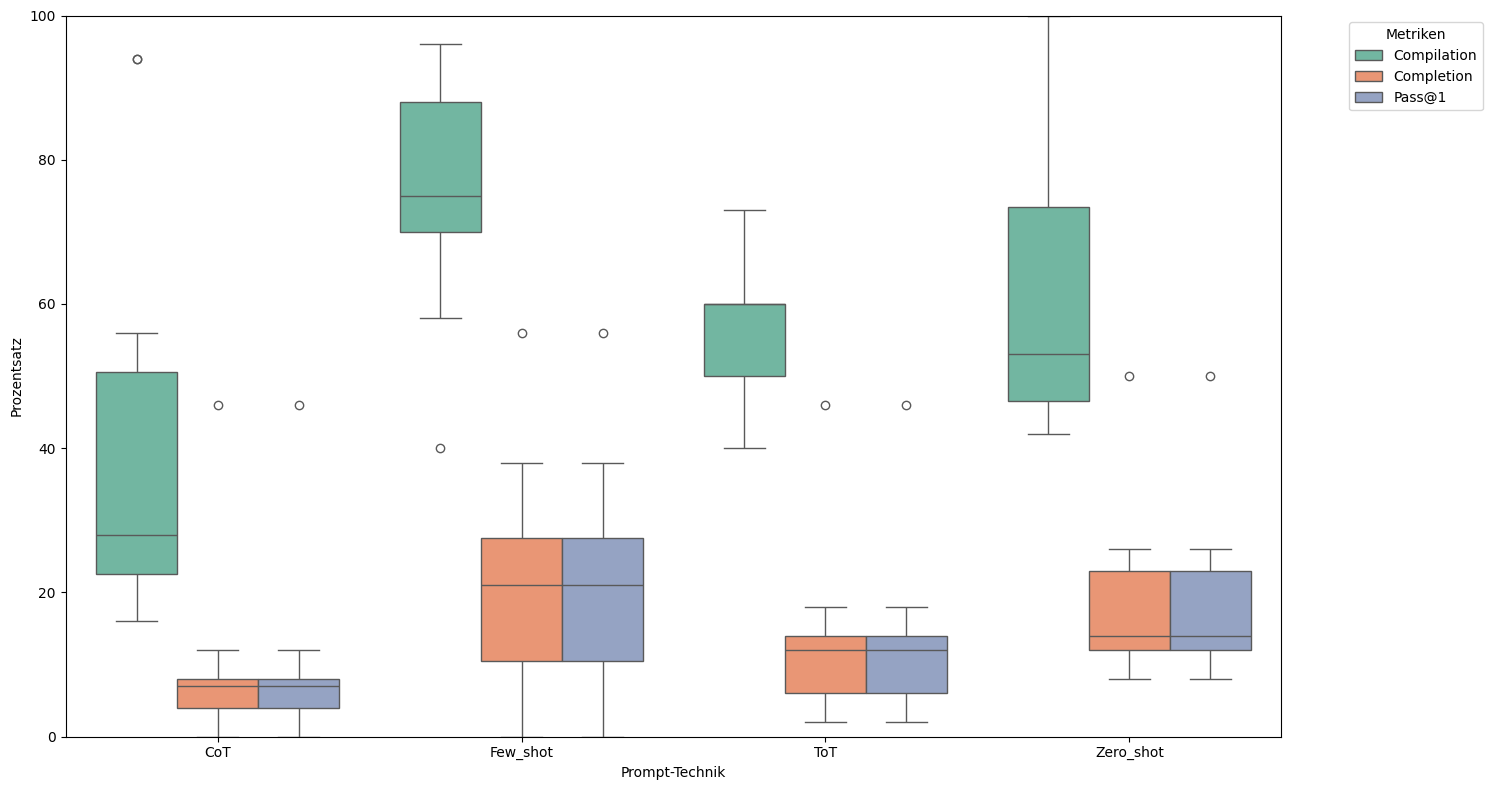

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Lade die CSV-Datei
csv_file = 'eval_pass@K.csv'
data = pd.read_csv(csv_file)

# Erstelle ein DataFrame
df = pd.DataFrame(data)

# Bereite die Daten für den Boxplot vor
melted_df = df.melt(id_vars=['model_name', 'prompt_technik'], 
                    value_vars=['Compilation', 'Completion', 'Pass@1'], 
                    var_name='Metrik', value_name='Wert')

# Erstelle das Diagramm
plt.figure(figsize=(15, 8))
sns.boxplot(x='prompt_technik', y='Wert', hue='Metrik', data=melted_df, palette='Set2')

plt.xlabel('Prompt-Technik')
plt.ylabel('Prozentsatz')
plt.legend(title='Metriken', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.ylim(0, 100)
plt.tight_layout()
plt.show()
